In [1]:
!pip install -U openmim
!mim install mmengine

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.2.0/index.html


In [2]:
!pip install mmcv==2.1.0
!mim install "mmdet==3.2.0"
!mim install "mmpose>=1.1.0"

  Using cached mmcv-2.1.0.tar.gz (471 kB)
  Preparing metadata (setup.py) ... 

done
  Created wheel for mmcv: filename=mmcv-2.1.0-cp310-cp310-linux_x86_64.whl size=1355950 sha256=1943a859fe83154d523cd30b40f499345e64e0363b62bb495f3a82a4c24500a0
  Stored in directory: /home/zeus/.cache/pip/wheels/8b/09/35/94a7f7ba6a00e3810abd0492340e4cbba0ff3d443120a94120
Successfully built mmcv
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.2.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 130.2 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.2.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmdet: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
  Preparing met

In [19]:
!git clone https://github.com/open-mmlab/mmpose.git
%cd mmpose
!pip install -r requirements.txt
!pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.

Cloning into 'mmpose'...



/teamspace/studios/this_studio/mmpose
Using pip 24.2 from /home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/pip (python 3.10)
Obtaining file:///teamspace/studios/this_studio/mmpose
  Preparing metadata (setup.py) ...   Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-r_76t35z/mmpose.egg-info
  writing manifest file '/tmp/pip-pip-egg-info-r_76t35z/mmpose.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-r_76t35z/mmpose.egg-info/SOURCES.txt'
done
  DEPRECATION: Legacy editable install of mmpose==1.3.2 from file:///teamspace/studios/this_studio/mmpose (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion

In [20]:
!wget https://download.openmmlab.com/mmpose/v1/projects/rtmo/rtmo-m_16xb16-600e_coco-640x640-6f4e0306_20231211.pth

--2024-09-28 07:21:16--  https://download.openmmlab.com/mmpose/v1/projects/rtmo/rtmo-m_16xb16-600e_coco-640x640-6f4e0306_20231211.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.25.82.163, 8.25.82.165, 8.25.82.176, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.25.82.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90450154 (86M) [application/octet-stream]
Saving to: ‘rtmo-m_16xb16-600e_coco-640x640-6f4e0306_20231211.pth’

b16-600e_coco-640x6  69%[============>       ]  60.05M  17.4MB/s    eta 2s     

rtmo-m_16xb16-600e_ 100%[===================>]  86.26M  18.1MB/s    in 5.5s    

2024-09-28 07:21:22 (15.7 MB/s) - ‘rtmo-m_16xb16-600e_coco-640x640-6f4e0306_20231211.pth’ saved [90450154/90450154]



In [5]:
%cd ..
!git clone https://github.com/ifzhang/ByteTrack.git
%cd ByteTrack

/teamspace/studios/this_studio
Cloning into 'ByteTrack'...

/teamspace/studios/this_studio/ByteTrack


In [6]:
!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox onemetric loguru lap thop==0.1.1.post2209072238
from IPython import display
display.clear_output()

In [1]:
import sys
sys.path.append('/teamspace/studios/this_studio/ByteTrack')
sys.path.append('/teamspace/studios/this_studio/mmpose')

In [5]:
%cd this_studio

/teamspace/studios/this_studio


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# %cd ..
%cd mmpose

/teamspace/studios/this_studio/mmpose


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from typing import Optional, List, Dict
from dataclasses import dataclass
from yolox.tracker.byte_tracker import STrack
from onemetric.cv.utils.iou import box_iou_batch
import numpy as np
np.float = np.float64
@dataclass
class Detection:
    x_min: float
    y_min: float
    x_max: float
    y_max: float
    keypoints: np.ndarray
    keypoint_scores: np.ndarray
    confidence: float
    tracker_id: Optional[int] = None

    @classmethod
    def from_numpy(cls, pred: np.ndarray, keypoints_list: List[np.ndarray], keypoint_scores_list: List[np.ndarray]):
        result = []
        for (x_min, y_min, x_max, y_max, confidence), keypoints, keypoint_scores in zip(pred, keypoints_list, keypoint_scores_list):
            result.append(Detection(
                x_min = float(x_min),
                y_min = float(y_min),
                x_max = float(x_max),
                y_max = float(y_max),
                keypoints = keypoints,
                keypoint_scores = keypoint_scores,
                confidence=float(confidence)
            ))
        return result

@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

# converts List into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: List[Detection], with_confidence: bool = True) -> np.ndarray:
    return np.array([
        [
            detection.x_min,
            detection.y_min,
            detection.x_max,
            detection.y_max,
            detection.confidence
        ] if with_confidence else [
            detection.x_min,
            detection.y_min,
            detection.x_max,
            detection.y_max,
        ]
        for detection
        in detections
    ], dtype=float)
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=np.float64)

def match_detections_with_tracks(
    detections: List[Detection],
    tracks: List[STrack]
) -> List:
    if not np.any(detections) or len(tracks) == 0:
        return np.empty((0,))
    detection_boxes = detections2boxes(detections=detections, with_confidence=False)
    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detection_boxes)
    track2detection = np.argmax(iou, axis=1)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            detections[detection_index].tracker_id = tracks[tracker_index].track_id
    return detections

In [4]:
from mmpose.apis import MMPoseInferencer
import warnings
warnings.filterwarnings("ignore")
# inferencer = MMPoseInferencer('human')
config_file = 'configs/body_2d_keypoint/rtmo/coco/rtmo-m_16xb16-600e_coco-640x640.py'
checkpoint_file = 'rtmo-m_16xb16-600e_coco-640x640-6f4e0306_20231211.pth'

# build the inferencer with model config path and checkpoint path/URL
inferencer = MMPoseInferencer(
    pose2d=config_file,
    pose2d_weights=checkpoint_file,
    device= 'cuda:0'
)

Loads checkpoint by local backend from path: rtmo-m_16xb16-600e_coco-640x640-6f4e0306_20231211.pth
09/29 09:08:17 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.


In [9]:
import time
start = time.time()
img_path = './tests/data/coco/000000197388.jpg'
video = './Shoplifting_Dataset/shoplifting/shop_lifter_39.mp4'
# img_path = './maxresdefault.jpg'
result_generator = inferencer(img_path, vis_out_dir='./vis_results')
result = next(result_generator)
end = time.time()
print(f'FPS: {1/(end-start)}, Inference time: {end-start}s')

09/27 08:28:44 - mmengine - INFO - the output image has been saved at ./vis_results/000000197388.jpg
FPS: 31.241789755163758, Inference time: 0.03200840950012207s


In [5]:
import time
start = time.time()
# img_path = './tests/data/coco/000000197388.jpg'
video = './Shoplifting_Dataset/shoplifting/shop_lifter_39.mp4'
# img_path = './maxresdefault.jpg'
result_generator = inferencer(video, vis_out_dir='./vis_results')
results = [result for result in result_generator]
end = time.time()
print(f'FPS: {len(results)/(end-start)}, Inference time: {end-start}s')

09/27 10:14:36 - mmengine - INFO - the output video has been saved at ./vis_results/shop_lifter_39.mp4
FPS: 40.55239589654927, Inference time: 14.05588960647583s


In [ ]:
import pickle
with open("results.pkl", "wb") as fp:   #Pickling
    pickle.dump(results, fp)

In [15]:
vcap = cv2.VideoCapture(video)
total_frames = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
print(total_frames)

570


In [22]:
!pip install gdown 
!gdown 1P1CK-0TBz_pglDBYPDvOKglDrdeGc113

Downloading...
From (original): https://drive.google.com/uc?id=1P1CK-0TBz_pglDBYPDvOKglDrdeGc113
From (redirected): https://drive.google.com/uc?id=1P1CK-0TBz_pglDBYPDvOKglDrdeGc113&confirm=t&uuid=3c43eec2-2858-4613-b478-37bc480fa5dd
To: /teamspace/studios/this_studio/mmpose/dataset_4labels.zip
100%|█████████████████████████████████████████| 950M/950M [00:08<00:00, 116MB/s]


In [39]:
video_dir = './Shoplifting_Dataset/'  # Directory containing multiple videos
for video_label in os.listdir(video_dir):
    print(video_label)
    for video_file in os.listdir(os.path.join(video_dir,video_label)):
        if video_file.endswith('.mp4'):  # Process only .mp4 files
            print(video_file)
            break

normal
shop_lifter_n_26.mp4
take and buy
shop_lifter_n_116.mp4
see and let
shop_lifter_n_213.mp4
shoplifting
shop_lifter_55.mp4


In [41]:
video_dir_wlabel = os.path.join(video_dir,video_label)
video_path = os.path.join(video_dir_wlabel, video_file)
video_path

'./Shoplifting_Dataset/shoplifting/shop_lifter_39.mp4'

In [7]:
from psutil import *
cpu_count()

16

In [9]:
!pip install sparse

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 178.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 215.4 MB/s eta 0:00:0000:01


In [8]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 25
model		: 1
model name	: AMD EPYC 7R13 Processor
stepping	: 1
microcode	: 0xa0011d5
cpu MHz		: 2650.000
cache size	: 512 KB
physical id	: 0
siblings	: 16
core id		: 0
cpu cores	: 8
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 16
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid aperfmperf tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch topoext invpcid_single ssbd ibrs ibpb stibp vmmcall fsgsbase bmi1 avx2 smep bmi2 invpcid rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr rdpru wbnoinvd arat npt nrip_save vaes vpclmulqdq rdpid
bugs		: sysret_ss_attrs null_seg spectre_

In [5]:
import os
import time
import cv2
import glob
from PIL import Image, ImageDraw, ImageFont
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from yolox.tracker.byte_tracker import BYTETracker, STrack
from multiprocessing import Pool
import sparse

def generate_joint_heatmaps(keypoints, heatmap_size, sigma=0.6):
    """
    Generate a heatmap for each keypoint and stack them into a 3D volume (KxHxW).

    Args:
    - keypoints: numpy array of shape (K, 3), where K is the number of keypoints,
                 and each keypoint is represented as (x, y, c) for coordinates and confidence score.
    - heatmap_size: tuple (H, W), the size of each heatmap (height, width).
    - sigma: standard deviation (spread) of the Gaussian.

    Returns:
    - heatmaps: numpy array of shape (K, H, W), the stacked 3D heatmaps.
    """
    K = keypoints.shape[0]
    H, W = heatmap_size

    # Initialize the 3D heatmap volume: shape (K, H, W)
    heatmaps = np.zeros((K, H, W), dtype=np.float32)

    # Create a meshgrid for the heatmap
    x = np.arange(0, W, 1)
    y = np.arange(0, H, 1)
    xx, yy = np.meshgrid(x, y)

    # Generate a heatmap for each keypoint
    for k in range(K):
        xk, yk, ck = keypoints[k]  # Extract (x, y, confidence) for keypoint k
        # Apply the Gaussian formula from the equation
        gaussian_map = np.exp(-((xx - xk) ** 2 + (yy - yk) ** 2) / (2 * sigma ** 2)) * ck
        heatmaps[k] = gaussian_map  # Store the heatmap for keypoint k

    return heatmaps

def distance_to_segment(px, py, ax, ay, bx, by):
    """
    Compute the distance from point (px, py) to the line segment between (ax, ay) and (bx, by).
    Vectorized operation for entire heatmap at once.
    """
    # Vectorize the line segment length
    segment_length_sq = (bx - ax) ** 2 + (by - ay) ** 2

    # Prevent division by zero in case a and b are the same points
    segment_length_sq = np.maximum(segment_length_sq, 1e-8)

    # Projection of the point onto the line segment
    t = np.clip(((px - ax) * (bx - ax) + (py - ay) * (by - ay)) / segment_length_sq, 0, 1)

    # Projection coordinates on the line segment
    proj_x = ax + t * (bx - ax)
    proj_y = ay + t * (by - ay)

    # Distance from point (px, py) to the projection
    return np.sqrt((px - proj_x) ** 2 + (py - proj_y) ** 2)

def generate_limb_heatmaps(limb_pairs, heatmap_size, sigma=0.6):
    """
    Generate limb heatmaps for all limb pairs and stack them into a 3D volume (KxHxW).

    Args:
    - limb_pairs: numpy array of shape (K, 2, 3), where K is the number of limbs,
                  and each limb is represented by two keypoints ((x_a, y_a, c_a), (x_b, y_b, c_b)).
    - heatmap_size: tuple (H, W), the size of each heatmap (height, width).
    - sigma: standard deviation (spread) of the Gaussian.

    Returns:
    - heatmaps: numpy array of shape (K, H, W), the stacked 3D heatmaps for limbs.
    """
    K = limb_pairs.shape[0]
    H, W = heatmap_size

    # Initialize the 3D heatmap volume: shape (K, H, W)
    heatmaps = np.zeros((K, H, W), dtype=np.float32)

    # Create a meshgrid for the heatmap
    x = np.arange(0, W, 1)
    y = np.arange(0, H, 1)
    xx, yy = np.meshgrid(x, y)

    for k in range(K):
        # Extract coordinates and confidence scores for the two keypoints forming the limb
        (xa, ya, ca), (xb, yb, cb) = limb_pairs[k]

        # Compute the distance of each point in the heatmap to the limb segment
        distances = distance_to_segment(xx, yy, xa, ya, xb, yb)

        # Apply the Gaussian formula
        gaussian_map = np.exp(-distances ** 2 / (2 * sigma ** 2))

        # Multiply by the minimum confidence between the two keypoints
        confidence = min(ca, cb)
        heatmaps[k] = gaussian_map * confidence

    return heatmaps

def generate_limb_pairs(keypoints, connections):
    """
    Generate limb pairs for each connection of keypoints.

    Args:
    - keypoints: numpy array of shape (K, 3), where K is the number of keypoints,
                 and each keypoint is represented as (x, y, c).
    - connections: list of tuples, where each tuple contains two indices representing a connection
                   between two keypoints (e.g., (a, b)).

    Returns:
    - limb_pairs: numpy array of shape (L, 2, 3), where L is the number of limbs,
                  and each limb contains two keypoints represented as (x, y, c).
    """
    limb_pairs = []

    for (a, b) in connections:
        if a < keypoints.shape[0] and b < keypoints.shape[0]:
            # Extract the keypoints corresponding to the connection
            point_a = keypoints[a]
            point_b = keypoints[b]
            limb_pairs.append([point_a, point_b])

    return np.array(limb_pairs)

def get_frame(cap, frame_index):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)  # Set to desired frame index
    ret, frame = cap.read()  # Read the frame
    # cap.release()  # Release the video capture
    return frame if ret else None  # Return frame if read successfully

def adjust_keypoints_for_new_shape(keypoints, new_img_shape=(56, 56), threshold= 10, padding=0.25, allow_imgpad=True):
    kp = np.array(keypoints)

    # Extract x and y coordinates
    kp_x = kp[:, 0]
    kp_y = kp[:, 1]

    # Calculate bounding box
    min_x = np.min(kp_x)
    min_y = np.min(kp_y)
    max_x = np.max(kp_x)
    max_y = np.max(kp_y)

    # Compute center and padded dimensions
    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2
    half_width = (max_x - min_x) / 2 * (1 + padding)
    half_height = (max_y - min_y) / 2 * (1 + padding)

    # Calculate the new bounding box
    min_x = center_x - half_width
    max_x = center_x + half_width
    min_y = center_y - half_height
    max_y = center_y + half_height
    # # The compact area is too small
    # if max_x - min_x < threshold or max_y - min_y < threshold:
    #     return keypoints

    # Ensure bounding box is within original image (if not allowed to pad outside)
    if not allow_imgpad:
        min_x = max(0, min_x)
        min_y = max(0, min_y)
        max_x = min(new_img_shape[1], max_x)
        max_y = min(new_img_shape[0], max_y)

    # Rescale the keypoints
    scale_x = new_img_shape[1] / (max_x - min_x)
    scale_y = new_img_shape[0] / (max_y - min_y)

    kp_x = (kp_x - min_x) * scale_x
    kp_y = (kp_y - min_y) * scale_y

    # Combine back the coordinates in list format
    adjusted_keypoints = [[float(x), float(y)] for x, y in zip(kp_x, kp_y)]

    return adjusted_keypoints

def process_video(video_info):
    video_file, video_dir_wlabel, output_heatmap = video_info
    person_id_counter = {}
    person_count = 0

    if video_file.endswith('.mp4') and video_file.split('.')[0] != '':
        # print(f"Processing {video_file}\n")
        video_path = os.path.join(video_dir_wlabel, video_file)

        # Create output directory for this video
        video_name = os.path.basename(video_file).replace('.mp4', '')
        output_heatmap_dir = os.path.join(output_heatmap, video_name)
        os.makedirs(output_heatmap_dir, exist_ok=True)

        # Open the video
        vcap = cv2.VideoCapture(video_path)
        total_frames = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))

        result_generator = inferencer(video_path, show=False)
        results = [result for result in result_generator]

        # for frame_id, result in enumerate(tqdm(results, desc=f"Processing {video_name}", unit="frame")):
        for frame_id, result in enumerate(results):
            vcap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
            ret, frame = vcap.read()

            bboxs = np.array([])
            keypoints_list = []
            keypoint_scores_list = []

            if len(result['predictions'][0]) != 0:
                for res in result['predictions'][0]:
                    if res['bbox_score'] > 0.45 and np.mean(res['keypoint_scores']) > 0.45:
                    # if res['bbox_score'] > 0.4:
                        box = np.array(res['bbox'][0], dtype=np.float32)
                        if len(bboxs) == 0:
                            box = np.append(box, res['bbox_score'])
                            bboxs = box
                        else:
                            box = np.append(box, res['bbox_score'])
                            bboxs = np.vstack((bboxs, box))

                        keypoints = res['keypoints']
                        # adjusted_keypoints = [[point[0], point[1]] for point in keypoints]
                        adjusted_keypoints = adjust_keypoints_for_new_shape(keypoints, heatmap_size)
                        keypoints_list.append(np.array(adjusted_keypoints))
                        keypoint_scores_list.append(res['keypoint_scores'])

                if len(bboxs) > 0:
                    if bboxs.ndim == 1:
                        bboxs = np.expand_dims(bboxs, 0)

                    detections = Detection.from_numpy(pred=bboxs.copy(), keypoints_list=keypoints_list.copy(), keypoint_scores_list=keypoint_scores_list)
                    tracks = byte_tracker.update(output_results=bboxs, img_info=frame.shape, img_size=frame.shape)
                    tracked_detections = match_detections_with_tracks(detections=detections.copy(), tracks=tracks.copy())
                    detection_boxes = detections2boxes(detections=tracked_detections, with_confidence=False)

                    if len(tracked_detections) > 0:
                        for i, tracked_detection in enumerate(tracked_detections):
                            if tracked_detection.tracker_id:
                                if tracked_detection.tracker_id not in person_id_counter:
                                    person_id_counter[tracked_detection.tracker_id] = person_count + 1
                                    heatmap_output_dir = f'{output_heatmap_dir}/id_{person_id_counter[tracked_detection.tracker_id]}'
                                    os.makedirs(heatmap_output_dir, exist_ok=True)
                                    person_count += 1

                                keypoints_w_conf = np.append(tracked_detection.keypoints.copy(), np.array(tracked_detection.keypoint_scores).reshape(-1, 1), 1)
                                # joint_heatmap = generate_joint_heatmaps(keypoints_w_conf, (frame.shape[0], frame.shape[1]))
                                joint_heatmap = generate_joint_heatmaps(keypoints_w_conf, heatmap_size)

                                limb_pairs = generate_limb_pairs(keypoints_w_conf, connections)
                                # limb_heatmap = generate_limb_heatmaps(limb_pairs, (frame.shape[0], frame.shape[1]))
                                limb_heatmap = generate_limb_heatmaps(limb_pairs, heatmap_size)

                                # np.save(os.path.join(heatmap_output_dir, f'j_frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.npy'), joint_heatmap)
                                # np.save(os.path.join(heatmap_output_dir, f'l_frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.npy'), limb_heatmap)
                                spare_joint_heatmap = sparse.COO(joint_heatmap)
                                spare_limb_heatmap = sparse.COO(limb_heatmap)

                                sparse.save_npz(os.path.join(heatmap_output_dir, f'j_frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.npz'),
                                                spare_joint_heatmap)
                                sparse.save_npz(os.path.join(heatmap_output_dir, f'l_frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.npz'),
                                                spare_limb_heatmap)

        vcap.release()

def parallel_process_videos(video_dir, output_heatmap, num_workers=8):
    video_dirs = [os.path.join(video_dir, label) for label in os.listdir(video_dir)]
    video_files = [(file, video_dir_wlabel, output_heatmap)
                   for video_dir_wlabel in video_dirs
                   for file in os.listdir(video_dir_wlabel) if file.endswith('.mp4')]
    # with Pool(processes=num_workers) as pool:
    #     pool.map(process_video, video_files)
    for video_file in tqdm(video_files, desc=f"Processing folder", unit="file"):
        process_video(video_file)

if __name__ == '__main__':
    # Initialize video capture and related settings
    person_id_counter = {}
    person_count = 0
    byte_tracker = BYTETracker(BYTETrackerArgs())

    # Set paths
    # video_dir = './Shoplifting_Dataset/'  # Directory containing multiple videos
    video_dir = '/teamspace/studios/this_studio/mmpose/Shoplifting_Dataset'
    # output_dir = './Heatmap_Dataset/'
    # output_frame = './Heatmap_Dataset/rgb/'
    # output_heatmap = './Heatmap_Dataset/'
    output_heatmap = '/teamspace/studios/this_studio/mmpose/Heatmap_Dataset'
    # video_path = 'shop_lifter_39.mp4'
    # Heatmap size
    heatmap_size = (56,56)
    connections = [(0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (5, 7),
                (7, 9), (0, 6), (6, 8), (8, 10), (5, 11), (11, 13),
                (13, 15), (6, 12), (12, 14), (14, 16), (11, 12)]

    # Create output directory for this video
    # video_name = os.path.basename(video_path).replace('.mp4', '')
    # # output_frame_dir = os.path.join(output_frame, video_name)
    # output_heatmap_dir = os.path.join(output_heatmap, video_name)
    # if not os.path.exists(output_frame_dir):
    #     os.makedirs(output_frame_dir)
    if not os.path.exists(output_heatmap):
        os.makedirs(output_heatmap)

    # Open the video
    parallel_process_videos(video_dir, output_heatmap, num_workers=8)

Processing folder:   0%|          | 0/342 [00:00<?, ?file/s]

In [9]:
import os
import shutil

def count_heatmaps(person_folder):
    """Count the number of heatmap files in a folder."""
    heatmap_count = 0
    for file in os.listdir(person_folder):
        if file.endswith('.npz') and (file.startswith('j_frame') or file.startswith('l_frame')):
            heatmap_count += 1
    return heatmap_count

def remove_directory(directory):
    """Remove a directory and all its contents."""
    if os.path.exists(directory):
        shutil.rmtree(directory)
        print(f'Removed directory: {directory}')

def filter_and_rename_ids(dataset_folder):
    """Filter and rename ID folders based on heatmap count."""
    # Loop through each shoplifter folder
    for shoplifter in os.listdir(dataset_folder):
        shoplifter_path = os.path.join(dataset_folder, shoplifter)
        if os.path.isdir(shoplifter_path):
            id_counts = {}
            
            # Loop through each ID folder inside the shoplifter folder
            for id_folder in os.listdir(shoplifter_path):
                id_path = os.path.join(shoplifter_path, id_folder)
                if os.path.isdir(id_path):
                    # Count the heatmaps in this ID folder
                    heatmap_count = count_heatmaps(id_path)
                    id_counts[id_folder] = heatmap_count
            
            # Identify the ID with the maximum heatmap count
            if len(id_counts) > 1:
                # Find the ID with the most heatmaps
                right_id = max(id_counts, key=id_counts.get)
                right_id_count = id_counts[right_id]
                
                # Remove all ID folders except the one with the most heatmaps
                for id_folder in id_counts:
                    id_path = os.path.join(shoplifter_path, id_folder)
                    if id_folder != right_id:
                        print(f'{id_folder} have {id_counts[id_folder]} file')
                        remove_directory(id_path)  # Remove the folder and its contents
                
                # Rename the right ID to 'id_1'
                right_id_path = os.path.join(shoplifter_path, right_id)
                new_id_path = os.path.join(shoplifter_path, 'id_1')

                if right_id_count > 0:  # Only rename if it has heatmaps
                    print(f'Renaming "{right_id}" to "id_1" in "{shoplifter}".')
                    os.rename(right_id_path, new_id_path)

# Set the path to your dataset folder
dataset_folder = './Heatmap_Dataset copy'  # Change this to your actual dataset path
filter_and_rename_ids(dataset_folder)

id_1 have 194 file
Removed directory: ./Heatmap_Dataset/shop_lifter_n_14/id_1
Renaming "id_2" to "id_1" in "shop_lifter_n_14".
id_2 have 86 file
Removed directory: ./Heatmap_Dataset/shop_lifter_94/id_2
Renaming "id_1" to "id_1" in "shop_lifter_94".
id_1 have 8 file
Removed directory: ./Heatmap_Dataset/shop_lifter_23/id_1
Renaming "id_2" to "id_1" in "shop_lifter_23".
id_2 have 20 file
Removed directory: ./Heatmap_Dataset/shop_lifter_52/id_2
id_1 have 4 file
Removed directory: ./Heatmap_Dataset/shop_lifter_52/id_1
Renaming "id_3" to "id_1" in "shop_lifter_52".
id_1 have 14 file
Removed directory: ./Heatmap_Dataset/shop_lifter_n_109/id_1
Renaming "id_2" to "id_1" in "shop_lifter_n_109".
id_1 have 4 file
Removed directory: ./Heatmap_Dataset/shop_lifter_50/id_1
Renaming "id_2" to "id_1" in "shop_lifter_50".
id_1 have 14 file
Removed directory: ./Heatmap_Dataset/shop_lifter_n_119/id_1
Renaming "id_2" to "id_1" in "shop_lifter_n_119".
id_1 have 4 file
Removed directory: ./Heatmap_Dataset/sho

In [11]:
!ls

Heatmap_Dataset  apis	  datasets    models	   testing     visualization
__init__.py	 codecs   engine      registry.py  utils
__pycache__	 configs  evaluation  structures   version.py


In [32]:
import os
import time
import cv2
import glob
import torch
import torchvision
from PIL import Image, ImageDraw, ImageFont
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torchvision.utils import draw_bounding_boxes
from yolox.tracker.byte_tracker import BYTETracker, STrack

def generate_joint_heatmaps(keypoints, heatmap_size, sigma=0.6):
    """
    Generate a heatmap for each keypoint and stack them into a 3D volume (KxHxW).

    Args:
    - keypoints: numpy array of shape (K, 3), where K is the number of keypoints,
                 and each keypoint is represented as (x, y, c) for coordinates and confidence score.
    - heatmap_size: tuple (H, W), the size of each heatmap (height, width).
    - sigma: standard deviation (spread) of the Gaussian.

    Returns:
    - heatmaps: numpy array of shape (K, H, W), the stacked 3D heatmaps.
    """
    K = keypoints.shape[0]
    H, W = heatmap_size

    # Initialize the 3D heatmap volume: shape (K, H, W)
    heatmaps = np.zeros((K, H, W), dtype=np.float32)

    # Create a meshgrid for the heatmap
    x = np.arange(0, W, 1)
    y = np.arange(0, H, 1)
    xx, yy = np.meshgrid(x, y)

    # Generate a heatmap for each keypoint
    for k in range(K):
        xk, yk, ck = keypoints[k]  # Extract (x, y, confidence) for keypoint k
        # Apply the Gaussian formula from the equation
        gaussian_map = np.exp(-((xx - xk) ** 2 + (yy - yk) ** 2) / (2 * sigma ** 2)) * ck
        heatmaps[k] = gaussian_map  # Store the heatmap for keypoint k

    return heatmaps
    
def distance_to_segment(px, py, ax, ay, bx, by):
    """
    Compute the distance from point (px, py) to the line segment between (ax, ay) and (bx, by).
    Vectorized operation for entire heatmap at once.
    """
    # Vectorize the line segment length
    segment_length_sq = (bx - ax) ** 2 + (by - ay) ** 2
    
    # Prevent division by zero in case a and b are the same points
    segment_length_sq = np.maximum(segment_length_sq, 1e-8)
    
    # Projection of the point onto the line segment
    t = np.clip(((px - ax) * (bx - ax) + (py - ay) * (by - ay)) / segment_length_sq, 0, 1)
    
    # Projection coordinates on the line segment
    proj_x = ax + t * (bx - ax)
    proj_y = ay + t * (by - ay)
    
    # Distance from point (px, py) to the projection
    return np.sqrt((px - proj_x) ** 2 + (py - proj_y) ** 2)

def generate_limb_heatmaps(limb_pairs, heatmap_size, sigma=0.6):
    """
    Generate limb heatmaps for all limb pairs and stack them into a 3D volume (KxHxW).
    
    Args:
    - limb_pairs: numpy array of shape (K, 2, 3), where K is the number of limbs,
                  and each limb is represented by two keypoints ((x_a, y_a, c_a), (x_b, y_b, c_b)).
    - heatmap_size: tuple (H, W), the size of each heatmap (height, width).
    - sigma: standard deviation (spread) of the Gaussian.

    Returns:
    - heatmaps: numpy array of shape (K, H, W), the stacked 3D heatmaps for limbs.
    """
    K = limb_pairs.shape[0]
    H, W = heatmap_size

    # Initialize the 3D heatmap volume: shape (K, H, W)
    heatmaps = np.zeros((K, H, W), dtype=np.float32)

    # Create a meshgrid for the heatmap
    x = np.arange(0, W, 1)
    y = np.arange(0, H, 1)
    xx, yy = np.meshgrid(x, y)

    for k in range(K):
        # Extract coordinates and confidence scores for the two keypoints forming the limb
        (xa, ya, ca), (xb, yb, cb) = limb_pairs[k]

        # Compute the distance of each point in the heatmap to the limb segment
        distances = distance_to_segment(xx, yy, xa, ya, xb, yb)

        # Apply the Gaussian formula
        gaussian_map = np.exp(-distances ** 2 / (2 * sigma ** 2))

        # Multiply by the minimum confidence between the two keypoints
        confidence = min(ca, cb)
        heatmaps[k] = gaussian_map * confidence

    return heatmaps

def generate_limb_pairs(keypoints, connections):
    """
    Generate limb pairs for each connection of keypoints.

    Args:
    - keypoints: numpy array of shape (K, 3), where K is the number of keypoints,
                 and each keypoint is represented as (x, y, c).
    - connections: list of tuples, where each tuple contains two indices representing a connection
                   between two keypoints (e.g., (a, b)).

    Returns:
    - limb_pairs: numpy array of shape (L, 2, 3), where L is the number of limbs,
                  and each limb contains two keypoints represented as (x, y, c).
    """
    limb_pairs = []

    for (a, b) in connections:
        if a < keypoints.shape[0] and b < keypoints.shape[0]:
            # Extract the keypoints corresponding to the connection
            point_a = keypoints[a]
            point_b = keypoints[b]
            limb_pairs.append([point_a, point_b])

    return np.array(limb_pairs)

def get_frame(cap, frame_index):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)  # Set to desired frame index
    ret, frame = cap.read()  # Read the frame
    # cap.release()  # Release the video capture
    return frame if ret else None  # Return frame if read successfully

byte_tracker = BYTETracker(BYTETrackerArgs())

# Set paths
video_dir = './Shoplifting_Dataset/'  # Directory containing multiple videos
output_dir = './Heatmap_Dataset/'
# output_frame = './Heatmap_Dataset/rgb/'
output_heatmap = './Heatmap_Dataset/heatmap/'

# Heatmap size
connections = [
    (0, 1), (0, 2), (2, 4), (1, 3), (5,6), (5,7), (7,9), (6,8), (8,10), (5,11),
    (6,12), (11,12), (12,14), (11,13), (13,15), (14,16)
]

# Process each video in the directory    
for video_label in os.listdir(video_dir):
        video_dir_wlabel = os.path.join(video_dir,video_label)
        len_video_dir = len(glob.glob(os.path.join(video_dir_wlabel, "*")))
        video_files = os.listdir(video_dir_wlabel)
        # with tqdm(total=len_video_dir, desc=f"Processing folder {video_label}", unit="file") as pbar:
        for video_file in tqdm(video_files, desc=f"Processing folder {video_label}", unit="file"):
            person_id_counter = {}
            person_count = 0
            if video_file.endswith('.mp4'):  # Process only .mp4 files
                print(video_file)
                video_path = os.path.join(video_dir_wlabel, video_file)

                # Create output directory for this video
                video_name = os.path.basename(video_file).replace('.mp4', '')
                # output_frame_dir = os.path.join(output_frame, video_name)
                output_heatmap_dir = os.path.join(output_heatmap, video_name)
                # if not os.path.exists(output_frame_dir):
                #     os.makedirs(output_frame_dir)
                if not os.path.exists(output_heatmap_dir):
                    os.makedirs(output_heatmap_dir)

                # Open the video
                vcap = cv2.VideoCapture(video_path)
                total_frames = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))

                result_generator = inferencer(video_path, show=False)
                results = [result for result in result_generator]

                # Initialize the progress bar
                # with tqdm(total=total_frames, desc=f"Processing {video_name}", unit="frame") as pbar:
                for frame_id, result in enumerate(results):
                        # frame_id = 0
                        # while True:
                        #     ret, frame = vcap.read()
                        #     if not ret:
                        #         break
                        vcap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
                        ret, frame = vcap.read()
                        # frame = get_frame(vcap,frame_id)

                        # result_generator = inferencer(frame, show=False)
                        # result = next(result_generator)
                        bboxs = np.array([])
                        keypoints_list = []
                        keypoint_scores_list = []
                        # frame_draw = Image.fromarray(frame)
                        if len(result['predictions'][0]) != 0:
                            for i, res in enumerate(result['predictions'][0]):
                                # bounding box are xmin, ymin, xmax, ymax
                                if res['bbox_score'] > 0.45 and np.mean(res['keypoint_scores']) > 0.45:
                                    box = np.array(res['bbox'][0],dtype = np.float32)
                                    # crop_frame = frame[int(box[1]) : int(box[3]), int(box[0]) : int(box[2])]
                                    if len(bboxs) == 0:
                                        box = np.append(box,res['bbox_score'])
                                        bboxs = box
                                    else:
                                        box = np.append(box,res['bbox_score'])
                                        bboxs = np.vstack((bboxs,box))
                                    keypoints = res['keypoints']
                                    adjusted_keypoints = []
                                    for point in keypoints:
                                        adjusted_keypoints.append([point[0], point[1]])
                                    keypoints_list.append(np.array(adjusted_keypoints))
                                    keypoint_scores_list.append(res['keypoint_scores'])
                            if len(bboxs) > 0:
                                if bboxs.ndim == 1:
                                    bboxs = np.expand_dims(bboxs,0)
                                detections = Detection.from_numpy(pred=bboxs.copy(), keypoints_list = keypoints_list.copy(), keypoint_scores_list=keypoint_scores_list)
                                tracks = byte_tracker.update(
                                        output_results=bboxs,
                                        img_info=frame.shape,
                                        img_size=frame.shape
                                )
                                tracked_detections = match_detections_with_tracks(detections=detections.copy(), tracks=tracks.copy())
                                detection_boxes = detections2boxes(detections=tracked_detections, with_confidence=False)
                                if len(tracked_detections) > 0:
                                    for i, tracked_detection in enumerate(tracked_detections):

                                        if tracked_detection.tracker_id:
                                            if tracked_detection.tracker_id not in person_id_counter:
                                                person_id_counter[tracked_detection.tracker_id] = person_count + 1
                                                heatmap_output_dir = f'{output_heatmap_dir}/id_{person_id_counter[tracked_detection.tracker_id]}'
                                                # frame_output_dir = f'{output_frame_dir}/id_{person_id_counter[tracked_detection.tracker_id]}'
                                                os.makedirs(heatmap_output_dir, exist_ok=True)
                                                # os.makedirs(frame_output_dir, exist_ok=True)
                                                person_count += 1

                                            # crop_frame = frame[int(detection_boxes[i][1]) : int(detection_boxes[i][3]), int(detection_boxes[i][0]) : int(detection_boxes[i][2])].copy()
                                            # crop_frame = Image.fromarray(crop_frame[...,::-1],'RGB')
                                            # crop_frame.save(f'{frame_output_dir}/frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.jpg')

                                            keypoints_w_conf = tracked_detection.keypoints.copy()
                                            keypoints_w_conf = np.append(keypoints_w_conf, np.array(tracked_detection.keypoint_scores).reshape(-1,1),1)
                                            joint_heatmap = generate_joint_heatmaps(keypoints_w_conf, (frame.shape[0], frame.shape[1]))

                                            limb_pairs = generate_limb_pairs(keypoints_w_conf, connections)
                                            limb_heatmap = generate_limb_heatmaps(limb_pairs, (frame.shape[0], frame.shape[1]))

                                            np.save(os.path.join(heatmap_output_dir, f'j_frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.npy'),
                                                                joint_heatmap)
                                            np.save(os.path.join(heatmap_output_dir, f'l_frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.npy'), 
                                                                limb_heatmap)
                    # frame_id+=1
                # Release the video capture
                vcap.release()
            # pbar.update(1)
            

print("Processing complete for all videos!")


Processing folder normal:   0%|          | 0/85 [00:00<?, ?file/s]

shop_lifter_n_1.mp4


shop_lifter_n_102.mp4
shop_lifter_n_103.mp4
shop_lifter_n_107.mp4
shop_lifter_n_108.mp4
shop_lifter_n_11.mp4
shop_lifter_n_112.mp4


In [5]:
import os
import time
import cv2
import glob
import torch
import torchvision
from PIL import Image, ImageDraw, ImageFont
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torchvision.utils import draw_bounding_boxes
from yolox.tracker.byte_tracker import BYTETracker, STrack
from concurrent.futures import ThreadPoolExecutor, as_completed
from multiprocessing import Pool

def generate_joint_heatmaps(keypoints, heatmap_size, sigma=0.6):
    """
    Generate a heatmap for each keypoint and stack them into a 3D volume (KxHxW).

    Args:
    - keypoints: numpy array of shape (K, 3), where K is the number of keypoints,
                 and each keypoint is represented as (x, y, c) for coordinates and confidence score.
    - heatmap_size: tuple (H, W), the size of each heatmap (height, width).
    - sigma: standard deviation (spread) of the Gaussian.

    Returns:
    - heatmaps: numpy array of shape (K, H, W), the stacked 3D heatmaps.
    """
    K = keypoints.shape[0]
    H, W = heatmap_size

    # Initialize the 3D heatmap volume: shape (K, H, W)
    heatmaps = np.zeros((K, H, W), dtype=np.float32)

    # Create a meshgrid for the heatmap
    x = np.arange(0, W, 1)
    y = np.arange(0, H, 1)
    xx, yy = np.meshgrid(x, y)

    # Generate a heatmap for each keypoint
    for k in range(K):
        xk, yk, ck = keypoints[k]  # Extract (x, y, confidence) for keypoint k
        # Apply the Gaussian formula from the equation
        gaussian_map = np.exp(-((xx - xk) ** 2 + (yy - yk) ** 2) / (2 * sigma ** 2)) * ck
        heatmaps[k] = gaussian_map  # Store the heatmap for keypoint k

    return heatmaps
    
def distance_to_segment(px, py, ax, ay, bx, by):
    """
    Compute the distance from point (px, py) to the line segment between (ax, ay) and (bx, by).
    Vectorized operation for entire heatmap at once.
    """
    # Vectorize the line segment length
    segment_length_sq = (bx - ax) ** 2 + (by - ay) ** 2
    
    # Prevent division by zero in case a and b are the same points
    segment_length_sq = np.maximum(segment_length_sq, 1e-8)
    
    # Projection of the point onto the line segment
    t = np.clip(((px - ax) * (bx - ax) + (py - ay) * (by - ay)) / segment_length_sq, 0, 1)
    
    # Projection coordinates on the line segment
    proj_x = ax + t * (bx - ax)
    proj_y = ay + t * (by - ay)
    
    # Distance from point (px, py) to the projection
    return np.sqrt((px - proj_x) ** 2 + (py - proj_y) ** 2)

def generate_limb_heatmaps(limb_pairs, heatmap_size, sigma=0.6):
    """
    Generate limb heatmaps for all limb pairs and stack them into a 3D volume (KxHxW).
    
    Args:
    - limb_pairs: numpy array of shape (K, 2, 3), where K is the number of limbs,
                  and each limb is represented by two keypoints ((x_a, y_a, c_a), (x_b, y_b, c_b)).
    - heatmap_size: tuple (H, W), the size of each heatmap (height, width).
    - sigma: standard deviation (spread) of the Gaussian.

    Returns:
    - heatmaps: numpy array of shape (K, H, W), the stacked 3D heatmaps for limbs.
    """
    K = limb_pairs.shape[0]
    H, W = heatmap_size

    # Initialize the 3D heatmap volume: shape (K, H, W)
    heatmaps = np.zeros((K, H, W), dtype=np.float32)

    # Create a meshgrid for the heatmap
    x = np.arange(0, W, 1)
    y = np.arange(0, H, 1)
    xx, yy = np.meshgrid(x, y)

    for k in range(K):
        # Extract coordinates and confidence scores for the two keypoints forming the limb
        (xa, ya, ca), (xb, yb, cb) = limb_pairs[k]

        # Compute the distance of each point in the heatmap to the limb segment
        distances = distance_to_segment(xx, yy, xa, ya, xb, yb)

        # Apply the Gaussian formula
        gaussian_map = np.exp(-distances ** 2 / (2 * sigma ** 2))

        # Multiply by the minimum confidence between the two keypoints
        confidence = min(ca, cb)
        heatmaps[k] = gaussian_map * confidence

    return heatmaps

def generate_limb_pairs(keypoints, connections):
    """
    Generate limb pairs for each connection of keypoints.

    Args:
    - keypoints: numpy array of shape (K, 3), where K is the number of keypoints,
                 and each keypoint is represented as (x, y, c).
    - connections: list of tuples, where each tuple contains two indices representing a connection
                   between two keypoints (e.g., (a, b)).

    Returns:
    - limb_pairs: numpy array of shape (L, 2, 3), where L is the number of limbs,
                  and each limb contains two keypoints represented as (x, y, c).
    """
    limb_pairs = []

    for (a, b) in connections:
        if a < keypoints.shape[0] and b < keypoints.shape[0]:
            # Extract the keypoints corresponding to the connection
            point_a = keypoints[a]
            point_b = keypoints[b]
            limb_pairs.append([point_a, point_b])

    return np.array(limb_pairs)

def get_frame(cap, frame_index):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)  # Set to desired frame index
    ret, frame = cap.read()  # Read the frame
    # cap.release()  # Release the video capture
    return frame if ret else None  # Return frame if read successfully

def process_video(frame_id, result, person_count, person_id_counter):
    vcap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = vcap.read()
    if not ret:
        break  # Exit if frame not read successfully

    bboxs = np.array([])
    keypoints_list = []
    keypoint_scores_list = []
    # frame_draw = Image.fromarray(frame)
    if len(result['predictions'][0]) != 0:
        for i, res in enumerate(result['predictions'][0]):
            # bounding box are xmin, ymin, xmax, ymax
            if res['bbox_score'] > 0.45 and np.mean(res['keypoint_scores']) > 0.45:
                box = np.array(res['bbox'][0],dtype = np.float32)
                # crop_frame = frame[int(box[1]) : int(box[3]), int(box[0]) : int(box[2])]
                if len(bboxs) == 0:
                    box = np.append(box,res['bbox_score'])
                    bboxs = box
                else:
                    box = np.append(box,res['bbox_score'])
                    bboxs = np.vstack((bboxs,box))
                keypoints = res['keypoints']
                adjusted_keypoints = []
                for point in keypoints:
                    adjusted_keypoints.append([point[0], point[1]])
                keypoints_list.append(np.array(adjusted_keypoints))
                keypoint_scores_list.append(res['keypoint_scores'])
        if len(bboxs) > 0:
            if bboxs.ndim == 1:
                bboxs = np.expand_dims(bboxs,0)
            detections = Detection.from_numpy(pred=bboxs.copy(), keypoints_list = keypoints_list.copy(), keypoint_scores_list=keypoint_scores_list)
            tracks = byte_tracker.update(
                    output_results=bboxs,
                    img_info=frame.shape,
                    img_size=frame.shape
            )
            tracked_detections = match_detections_with_tracks(detections=detections.copy(), tracks=tracks.copy())
            detection_boxes = detections2boxes(detections=tracked_detections, with_confidence=False)
            if len(tracked_detections) > 0:
                for i, tracked_detection in enumerate(tracked_detections):

                    if tracked_detection.tracker_id:
                        if tracked_detection.tracker_id not in person_id_counter:
                            person_id_counter[tracked_detection.tracker_id] = person_count + 1
                            heatmap_output_dir = f'{output_heatmap_dir}/id_{person_id_counter[tracked_detection.tracker_id]}'
                            # frame_output_dir = f'{output_frame_dir}/id_{person_id_counter[tracked_detection.tracker_id]}'
                            os.makedirs(heatmap_output_dir, exist_ok=True)
                            # os.makedirs(frame_output_dir, exist_ok=True)
                            person_count += 1

                        # crop_frame = frame[int(detection_boxes[i][1]) : int(detection_boxes[i][3]), int(detection_boxes[i][0]) : int(detection_boxes[i][2])].copy()
                        # crop_frame = Image.fromarray(crop_frame[...,::-1],'RGB')
                        # crop_frame.save(f'{frame_output_dir}/frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.jpg')

                        keypoints_w_conf = tracked_detection.keypoints.copy()
                        keypoints_w_conf = np.append(keypoints_w_conf, np.array(tracked_detection.keypoint_scores).reshape(-1,1),1)
                        joint_heatmap = generate_joint_heatmaps(keypoints_w_conf, (frame.shape[0], frame.shape[1]))

                        limb_pairs = generate_limb_pairs(keypoints_w_conf, connections)
                        limb_heatmap = generate_limb_heatmaps(limb_pairs, (frame.shape[0], frame.shape[1]))

                        np.save(os.path.join(heatmap_output_dir, f'j_frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.npy'),
                                            joint_heatmap)
                        np.save(os.path.join(heatmap_output_dir, f'l_frame_{frame_id:04d}_person_{person_id_counter[tracked_detection.tracker_id]}.npy'), 
                                            limb_heatmap)


byte_tracker = BYTETracker(BYTETrackerArgs())

# Set paths
video_dir = './Shoplifting_Dataset/'  # Directory containing multiple videos
output_dir = './Heatmap_Dataset/'
# output_frame = './Heatmap_Dataset/rgb/'
output_heatmap = './Heatmap_Dataset/heatmap/'

# Heatmap size
connections = [
    (0, 1), (0, 2), (2, 4), (1, 3), (5,6), (5,7), (7,9), (6,8), (8,10), (5,11),
    (6,12), (11,12), (12,14), (11,13), (13,15), (14,16)
]

# Process each video in the directory    
for video_label in os.listdir(video_dir):
    video_dir_wlabel = os.path.join(video_dir, video_label)
    video_files = os.listdir(video_dir_wlabel)

    for video_file in tqdm(video_files, desc=f"Processing folder {video_label}", unit="file"):
        person_id_counter = {}
        person_count = 0
        if video_file.endswith('.mp4'):
            video_path = os.path.join(video_dir_wlabel, video_file)
            video_name = os.path.basename(video_file).replace('.mp4', '')
            output_heatmap_dir = os.path.join(output_heatmap, video_name)
            os.makedirs(output_heatmap_dir, exist_ok=True)

            # Open the video
            vcap = cv2.VideoCapture(video_path)
            total_frames = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))

            result_generator = inferencer(video_path, show=False)
            results = [result for result in result_generator]

            # Create a thread pool to process frames concurrently
            with Pool() as pool:

            vcap.release()

print("Processing complete for all videos!")


Processing folder normal:   0%|          | 0/85 [00:00<?, ?file/s]

: 

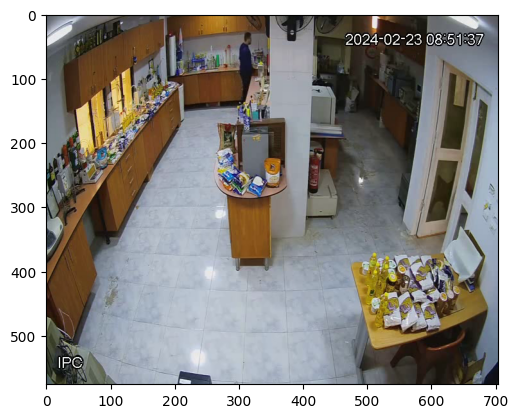

In [30]:
2/23 8:51:22
vcap = cv2.VideoCapture(video_path)
y = get_frame(vcap,frame_id)
plt.imshow(y[...,::-1])

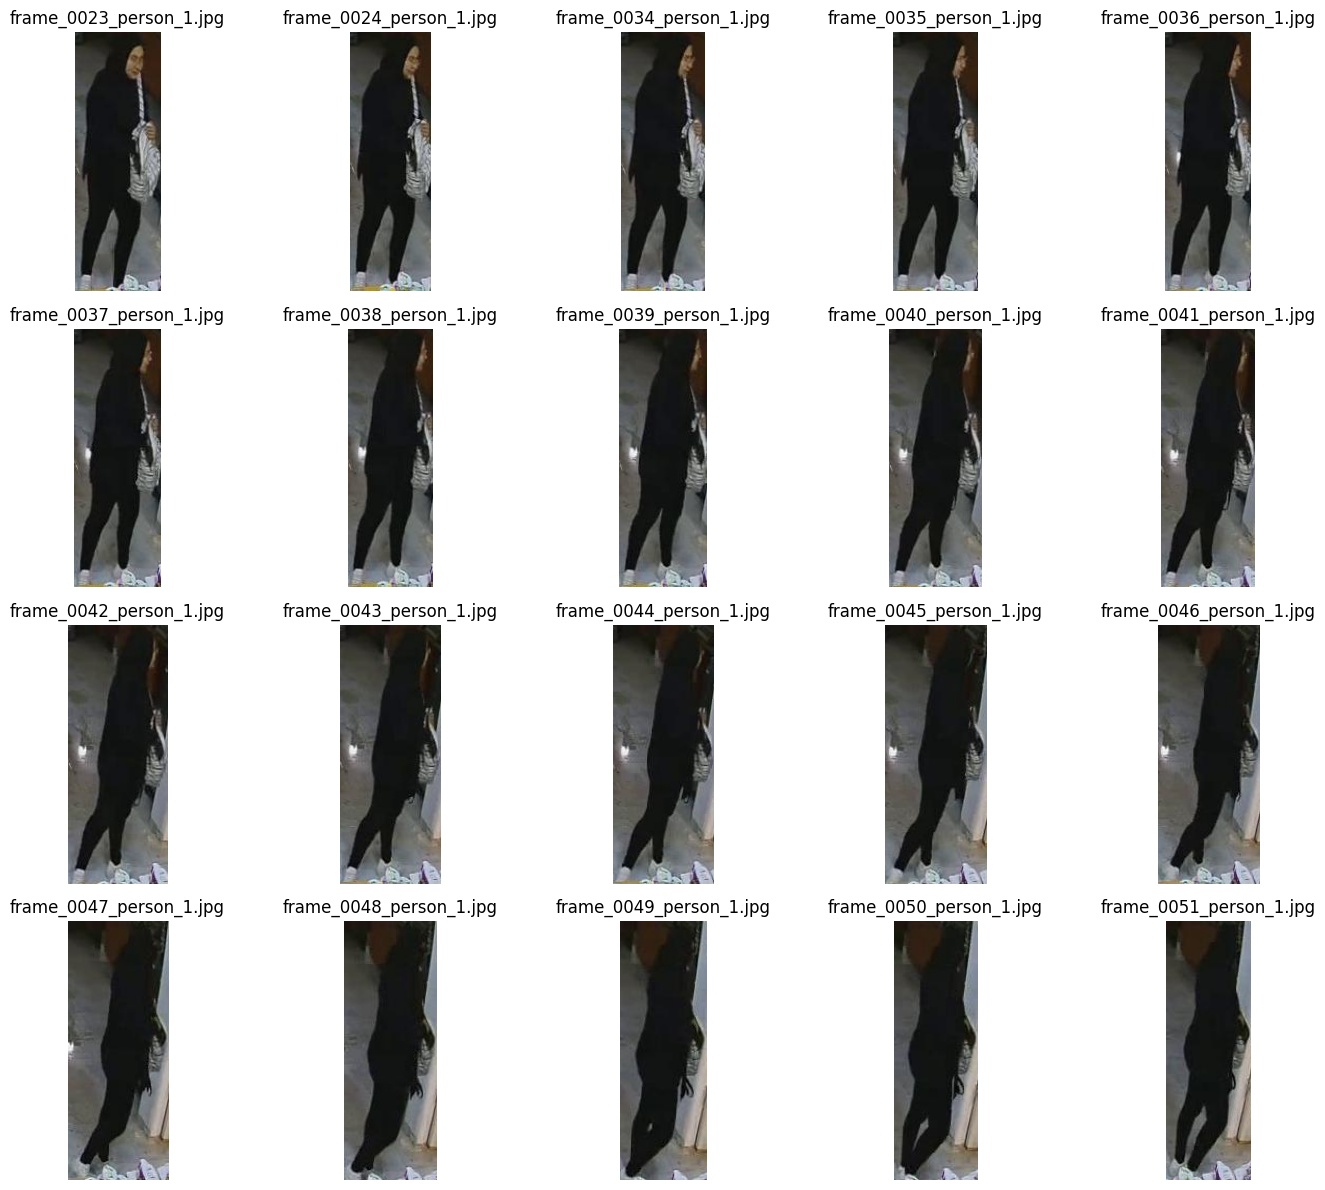

In [69]:
frame_files = [f for f in os.listdir(frame_output_dir) if f.endswith('.jpg')]
frame_files.sort()  # Sort the frame files for consistent ordering

# Limit to the first 20 frames or less if fewer frames are available
start_frame = 140
end_frame = 160
num_frames_to_show = min(end_frame - start_frame, len(frame_files) - start_frame)

# Set up the plot
fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # 4 rows, 5 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i in range(num_frames_to_show):
    frame_index = start_frame + i
    frame_file = os.path.join(frame_output_dir, frame_files[frame_index])
    image = Image.open(frame_file)
    axes[i].imshow(np.array(image))
    axes[i].axis('off')  # Hide axis
    axes[i].set_title(f"{frame_files[i]}")

# Hide any remaining empty subplots
for j in range(num_frames_to_show, 20):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

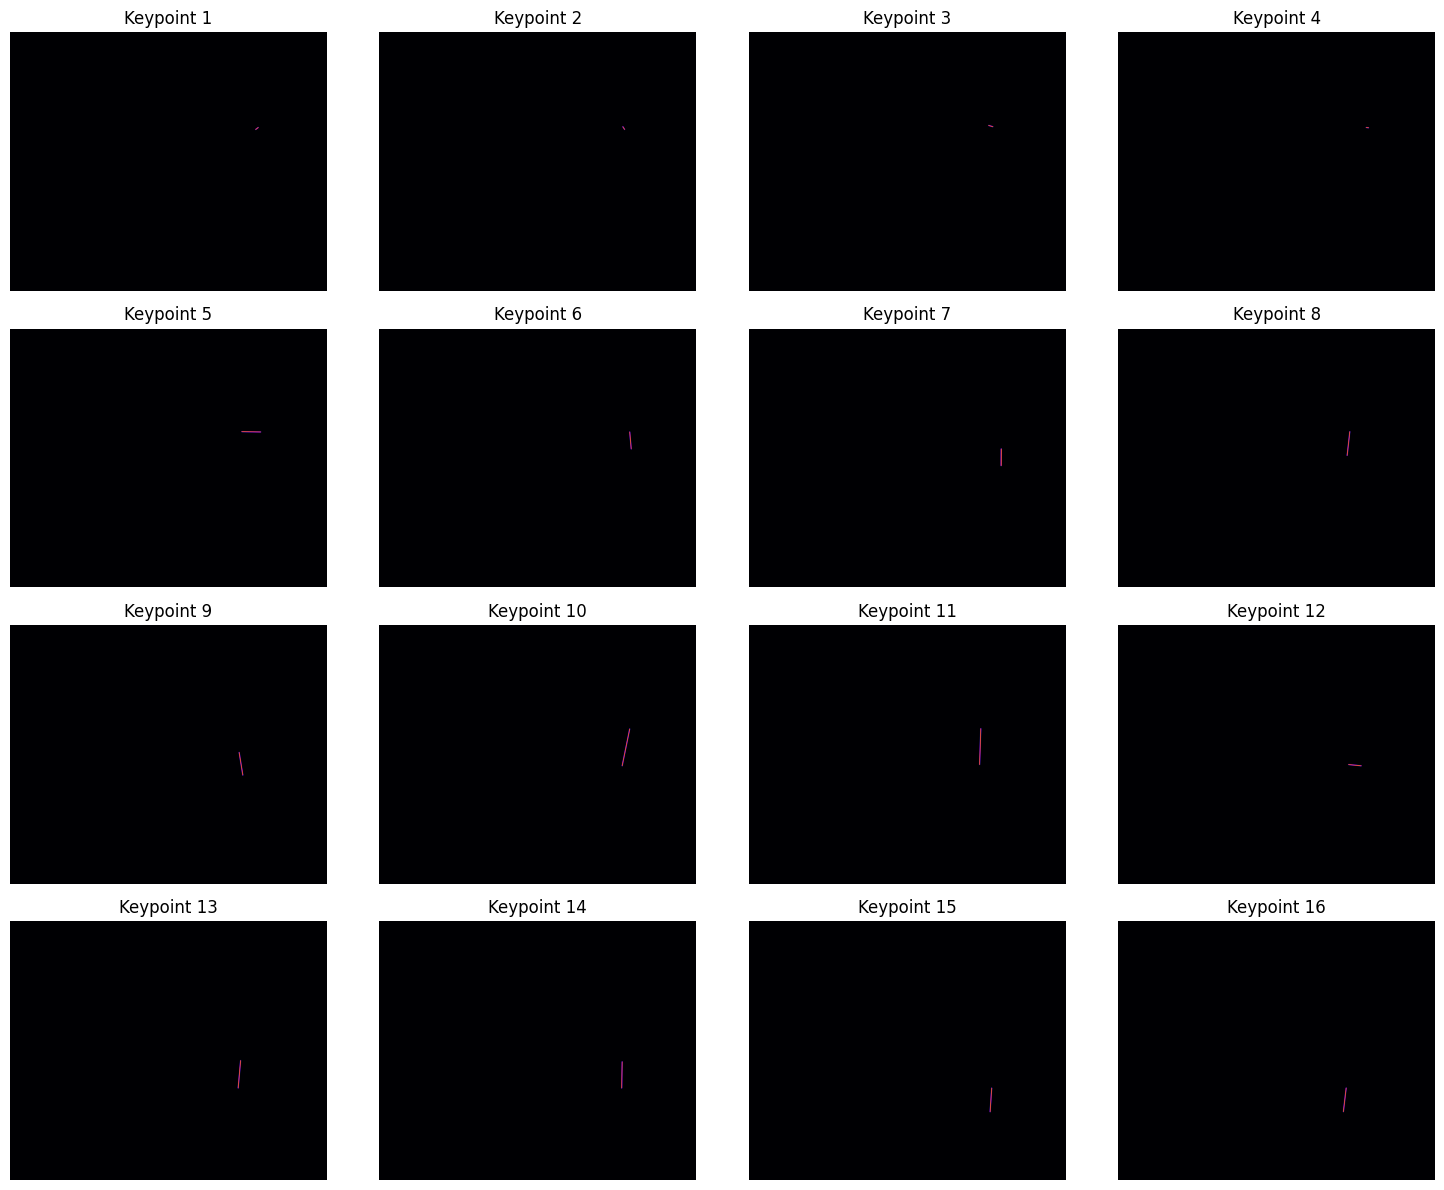

In [27]:
def visualize_heatmaps(heatmaps):
    """
    Visualize each heatmap from a 3D heatmap array.

    Args:
    - heatmaps: numpy array of shape (K, H, W), where K is the number of keypoints.
    """
    K = heatmaps.shape[0]  # Number of keypoints
    num_cols = 4  # Number of columns in the plot grid
    num_rows = (K + num_cols - 1) // num_cols  # Calculate rows needed
    # plt.figure(figsize=(5, 3))  # Adjust the figure size based on the number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    axes = axes.flatten()

    for k in range(K):
        ax = axes[k]
        ax.imshow(heatmaps[k], cmap='inferno')  # Show heatmap for keypoint k
        ax.axis('off')
        ax.set_title(f"Keypoint {k+1}")

    # Remove any extra subplots that are unused
    for i in range(K, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

frame_id = 100
heatmap_file = os.path.join(heatmap_output_dir, f'l_frame_{frame_id:04d}_person_1.npy')
heatmap = np.load(heatmap_file)

# Example usage
visualize_heatmaps(heatmap)

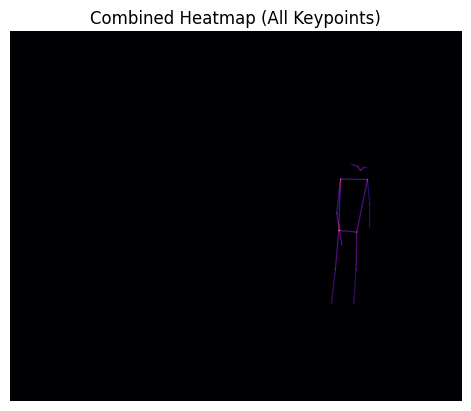

In [30]:
def combine_heatmaps(heatmaps, method='sum'):
    """
    Combine all keypoint heatmaps into one.

    Args:
    - heatmaps: numpy array of shape (K, H, W), where K is the number of keypoints.
    - method: 'sum' or 'average', method to combine heatmaps.

    Returns:
    - combined_heatmap: Combined heatmap of shape (H, W).
    """
    if method == 'sum':
        # Sum the heatmaps along the keypoint dimension
        combined_heatmap = np.sum(heatmaps, axis=0)
    elif method == 'average':
        # Average the heatmaps along the keypoint dimension
        combined_heatmap = np.mean(heatmaps, axis=0)
    else:
        raise ValueError("Invalid method. Use 'sum' or 'average'.")

    return combined_heatmap
combined_heatmap = combine_heatmaps(heatmap, method='average')

# Visualize the combined heatmap
plt.imshow(combined_heatmap, cmap='inferno')
plt.title("Combined Heatmap (All Keypoints)")
plt.axis('off')
plt.show()

In [ ]:
import os
import time
import cv2
import torch
import torchvision
from PIL import Image, ImageDraw, ImageFont
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torchvision.utils import draw_bounding_boxes
from yolox.tracker.byte_tracker import BYTETracker, STrack
import requests
import io
from urllib.request import urlopen

byte_tracker = BYTETracker(BYTETrackerArgs())
# print(byte_tracker._count)
# byte_tracker._count = 0
start = time.time()
video_path = './shop_lifter_0.mp4'
output_video_path= './vis_result/'
output_crop_frame = './crop_frames/'
if not os.path.exists(output_video_path):
  os.makedirs(output_video_path)
if not os.path.exists(output_crop_frame):
  os.makedirs(output_crop_frame)
vcap = cv2.VideoCapture(video_path)
total_frames = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
fps = int(vcap.get(cv2.CAP_PROP_FPS))
width = int(vcap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(f'{output_video_path}/shop_lifter_0.mp4', fourcc, fps, (width, height))

font =  ImageFont.load_default(size=30)

colors = list(mcolors.TABLEAU_COLORS.keys())
new_track = 0
count_ids = {}
connections = [
    (0, 1), (0, 2), (2, 4), (1, 3), (5,6), (5,7), (7,9), (6,8), (8,10), (5,11),
    (6,12), (11,12), (12,14), (11,13), (13,15), (14,16)
]

def draw_keypoints_and_edges(frame, tracked_detection, connections, color, crop=False):
    keypoints = tracked_detection.keypoints
    if crop:
      keypoints = keypoints
    else:
      x_min, y_min = tracked_detection.x_min, tracked_detection.y_min
      keypoints = keypoints + np.array([x_min, y_min])
    # Draw keypoints (if valid, i.e., not NaN or zeros)
    for i, point in enumerate(keypoints):
        if not np.isnan(point).any() and np.any(point):  # Check for missing keypoints
            center = tuple(map(int, point))  # Convert to tuple of integers
            cv2.circle(frame, center, 5, color, -1)  # Draw red keypoints

    # Draw lines between connected keypoints
    for connection in connections:
        start_idx, end_idx = connection
        if start_idx < len(keypoints) and end_idx < len(keypoints):
            start_point = keypoints[start_idx]
            end_point = keypoints[end_idx]
            if not (np.isnan(start_point).any() or np.isnan(end_point).any()):
                # Only draw if both points in the connection are valid
                start_point = tuple(map(int, start_point))
                end_point = tuple(map(int, end_point))
                cv2.line(frame, start_point, end_point, color, 2)  # Draw green lines

    return frame

def generate_joint_heatmaps(keypoints, heatmap_size, sigma=0.6):
    """
    Generate a heatmap for each keypoint and stack them into a 3D volume (KxHxW).

    Args:
    - keypoints: numpy array of shape (K, 3), where K is the number of keypoints,
                 and each keypoint is represented as (x, y, c) for coordinates and confidence score.
    - heatmap_size: tuple (H, W), the size of each heatmap (height, width).
    - sigma: standard deviation (spread) of the Gaussian.

    Returns:
    - heatmaps: numpy array of shape (K, H, W), the stacked 3D heatmaps.
    """
    K = keypoints.shape[0]
    H, W = heatmap_size

    # Initialize the 3D heatmap volume: shape (K, H, W)
    heatmaps = np.zeros((K, H, W), dtype=np.float32)

    # Create a meshgrid for the heatmap
    x = np.arange(0, W, 1)
    y = np.arange(0, H, 1)
    xx, yy = np.meshgrid(x, y)

    # Generate a heatmap for each keypoint
    for k in range(K):
        xk, yk, ck = keypoints[k]  # Extract (x, y, confidence) for keypoint k
        # Apply the Gaussian formula from the equation
        gaussian_map = np.exp(-((xx - xk) ** 2 + (yy - yk) ** 2) / (2 * sigma ** 2)) * ck
        heatmaps[k] = gaussian_map  # Store the heatmap for keypoint k

    return heatmaps
    
def distance_to_segment(px, py, ax, ay, bx, by):
    """
    Compute the distance from point (px, py) to the line segment between (ax, ay) and (bx, by).
    Vectorized operation for entire heatmap at once.
    """
    # Vectorize the line segment length
    segment_length_sq = (bx - ax) ** 2 + (by - ay) ** 2
    
    # Prevent division by zero in case a and b are the same points
    segment_length_sq = np.maximum(segment_length_sq, 1e-8)
    
    # Projection of the point onto the line segment
    t = np.clip(((px - ax) * (bx - ax) + (py - ay) * (by - ay)) / segment_length_sq, 0, 1)
    
    # Projection coordinates on the line segment
    proj_x = ax + t * (bx - ax)
    proj_y = ay + t * (by - ay)
    
    # Distance from point (px, py) to the projection
    return np.sqrt((px - proj_x) ** 2 + (py - proj_y) ** 2)

def generate_limb_heatmaps(limb_pairs, heatmap_size, sigma=0.6):
    """
    Generate limb heatmaps for all limb pairs and stack them into a 3D volume (KxHxW).
    
    Args:
    - limb_pairs: numpy array of shape (K, 2, 3), where K is the number of limbs,
                  and each limb is represented by two keypoints ((x_a, y_a, c_a), (x_b, y_b, c_b)).
    - heatmap_size: tuple (H, W), the size of each heatmap (height, width).
    - sigma: standard deviation (spread) of the Gaussian.

    Returns:
    - heatmaps: numpy array of shape (K, H, W), the stacked 3D heatmaps for limbs.
    """
    K = limb_pairs.shape[0]
    H, W = heatmap_size

    # Initialize the 3D heatmap volume: shape (K, H, W)
    heatmaps = np.zeros((K, H, W), dtype=np.float32)

    # Create a meshgrid for the heatmap
    x = np.arange(0, W, 1)
    y = np.arange(0, H, 1)
    xx, yy = np.meshgrid(x, y)

    for k in range(K):
        # Extract coordinates and confidence scores for the two keypoints forming the limb
        (xa, ya, ca), (xb, yb, cb) = limb_pairs[k]

        # Compute the distance of each point in the heatmap to the limb segment
        distances = distance_to_segment(xx, yy, xa, ya, xb, yb)

        # Apply the Gaussian formula
        gaussian_map = np.exp(-distances ** 2 / (2 * sigma ** 2))

        # Multiply by the minimum confidence between the two keypoints
        confidence = min(ca, cb)
        heatmaps[k] = gaussian_map * confidence

    return heatmaps

def generate_limb_pairs(keypoints, connections):
    """
    Generate limb pairs for each connection of keypoints.

    Args:
    - keypoints: numpy array of shape (K, 3), where K is the number of keypoints,
                 and each keypoint is represented as (x, y, c).
    - connections: list of tuples, where each tuple contains two indices representing a connection
                   between two keypoints (e.g., (a, b)).

    Returns:
    - limb_pairs: numpy array of shape (L, 2, 3), where L is the number of limbs,
                  and each limb contains two keypoints represented as (x, y, c).
    """
    limb_pairs = []

    for (a, b) in connections:
        if a < keypoints.shape[0] and b < keypoints.shape[0]:
            # Extract the keypoints corresponding to the connection
            point_a = keypoints[a]
            point_b = keypoints[b]
            limb_pairs.append([point_a, point_b])

    return np.array(limb_pairs)

with tqdm(total=total_frames, desc="Processing Video", unit="frame") as pbar:
    while True:
        ret, frame = vcap.read()
        if not ret:
            break
        result_generator = inferencer(frame, show=False)
        result = next(result_generator)
        bboxs = np.array([])
        keypoints_list = []
        keypoint_scores_list = []
        frame_draw = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # frame_draw = Image.fromarray(frame)
        if len(result['predictions'][0]) != 0:
          # frame_draw = torch.from_numpy(frame[...,::-1].copy())
          # frame_draw = torch.permute(frame_draw, (2, 0, 1))
          for i, res in enumerate(result['predictions'][0]):
              # bounding box are xmin, ymin, xmax, ymax
              if res['bbox_score'] > 0.45 and np.sum(res['keypoint_scores']) > 0.45:
                  box = np.array(res['bbox'][0],dtype = np.float32)
                  crop_frame = frame[int(box[1]) : int(box[3]), int(box[0]) : int(box[2])]
                  if len(bboxs) == 0:
                      box = np.append(box,res['bbox_score'])
                      bboxs = box
                  else:
                      box = np.append(box,res['bbox_score'])
                      bboxs = np.vstack((bboxs,box))
                  keypoints = res['keypoints']
                  adjusted_keypoints = []
                  for point in keypoints:
                      adjusted_keypoints.append([point[0] - box[0], point[1] - box[1]])
                  keypoints_list.append(np.array(adjusted_keypoints))
                  keypoint_scores_list.append(res['keypoint_scores'])
          if len(bboxs) > 0:
              if bboxs.ndim == 1:
                bboxs = np.expand_dims(bboxs,0)
              detections = Detection.from_numpy(pred=bboxs.copy(), keypoints_list = keypoints_list.copy(), keypoint_scores_list=keypoint_scores_list)
              tracks = byte_tracker.update(
                    output_results=bboxs,
                    img_info=frame.shape,
                    img_size=frame.shape
              )
              tracked_detections = match_detections_with_tracks(detections=detections.copy(), tracks=tracks.copy())
              detection_boxes = detections2boxes(detections=tracked_detections, with_confidence=False)
              # print(f'Got track:{tracked_detections}')
              if len(tracked_detections) > 0:
                  for i, tracked_detection in enumerate(tracked_detections):
                      # frame_draw = frame_draw.clone().detach()
                      if type(frame_draw) != torch.Tensor:
                        frame_draw = torch.from_numpy(frame_draw.copy())
                        frame_draw = torch.permute(frame_draw, (2, 0, 1))
                      box = torch.tensor(detection_boxes[i])
                      box = box.unsqueeze(0)
                      # draw bounding box and fill color
                      if tracked_detection.tracker_id:
                        if not os.path.exists(f'{output_crop_frame}/id_{tracked_detection.tracker_id}'):
                          os.makedirs(f'{output_crop_frame}/id_{tracked_detection.tracker_id}')
                        if not tracked_detection.tracker_id in count_ids:
                          count_ids[tracked_detection.tracker_id] = 1
                        else:
                          count_ids[tracked_detection.tracker_id] += 1
                        frame_draw = draw_bounding_boxes(frame_draw, box, width=2,
                                                  colors=colors[(tracked_detection.tracker_id) % 10].split(':')[-1],
                                                  fill=True)
                        fill_color = tuple([int(c * 255) for c in mcolors.to_rgb(colors[(tracked_detection.tracker_id) % 10])])
                        crop_frame = frame[int(detection_boxes[i][1]) : int(detection_boxes[i][3]), int(detection_boxes[i][0]) : int(detection_boxes[i][2])].copy()
                        draw_keypoints_and_edges(crop_frame, tracked_detection, connections, fill_color, crop=True)
                        keypoints_w_conf = tracked_detection.keypoints.copy()
                        keypoints_w_conf = np.append(keypoints_w_conf, np.array(tracked_detection.keypoint_scores).reshape(-1,1),1)
                        heatmap = generate_joint_heatmaps(keypoints_w_conf, (crop_frame.shape[0], crop_frame.shape[1]))
                        # for x,y in tracked_detection.keypoints:
                        #     crop_frame = cv2.circle(crop_frame, (int(x),int(y)), radius=0, color=fill_color, thickness=10)
                        crop_frame = Image.fromarray(crop_frame[...,::-1],'RGB')
                        crop_frame.save(f'{output_crop_frame}/id_{tracked_detection.tracker_id}/frame_{count_ids[tracked_detection.tracker_id]:04d}.jpg')
                      frame_draw = torchvision.transforms.ToPILImage()(frame_draw)
                      pil_draw = ImageDraw.Draw(frame_draw)
                      if tracked_detection.tracker_id:
                        pil_draw.text((detection_boxes[i][0], detection_boxes[i][1]-30), f'ID: {tracked_detection.tracker_id}', fill=fill_color, font = font)
                      frame_draw = np.array(frame_draw)
                      draw_keypoints_and_edges(frame_draw, tracked_detection, connections, fill_color)
                      # for i_key, (x,y) in enumerate(tracked_detection.keypoints):
                      #     cv2.circle(frame_draw,(int(detection_boxes[i][0]) + int(x), int(detection_boxes[i][1]) + int(y)), radius=0, color=fill_color, thickness=10)
                      #     cv2.putText(frame_draw, str(i_key), (int(detection_boxes[i][0]) + int(x), int(detection_boxes[i][1]) + int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5,fill_color, 2, cv2.LINE_AA)

                  frame_draw = cv2.cvtColor(frame_draw, cv2.COLOR_BGR2RGB)
                  out.write(frame_draw)
                  pbar.update(1)
              else:
                  out.write(frame_draw[...,::-1])
                  pbar.update(1)
          else:
              out.write(frame_draw[...,::-1])
              pbar.update(1)
        else:
          out.write(frame_draw[...,::-1])
          pbar.update(1)
vcap.release()
out.release()

end = time.time()
print(f'FPS: {total_frames/(end-start)}, Inference time: {end-start}s')

In [ ]:
keypoints_w_conf = tracked_detection.keypoints.copy()
keypoints_w_conf = np.append(keypoints_w_conf, np.array(tracked_detection.keypoint_scores).reshape(-1,1),1)
heatmap = generate_keypoint_heatmaps(keypoints_w_conf, (crop_frame.shape[0], crop_frame.shape[1]))

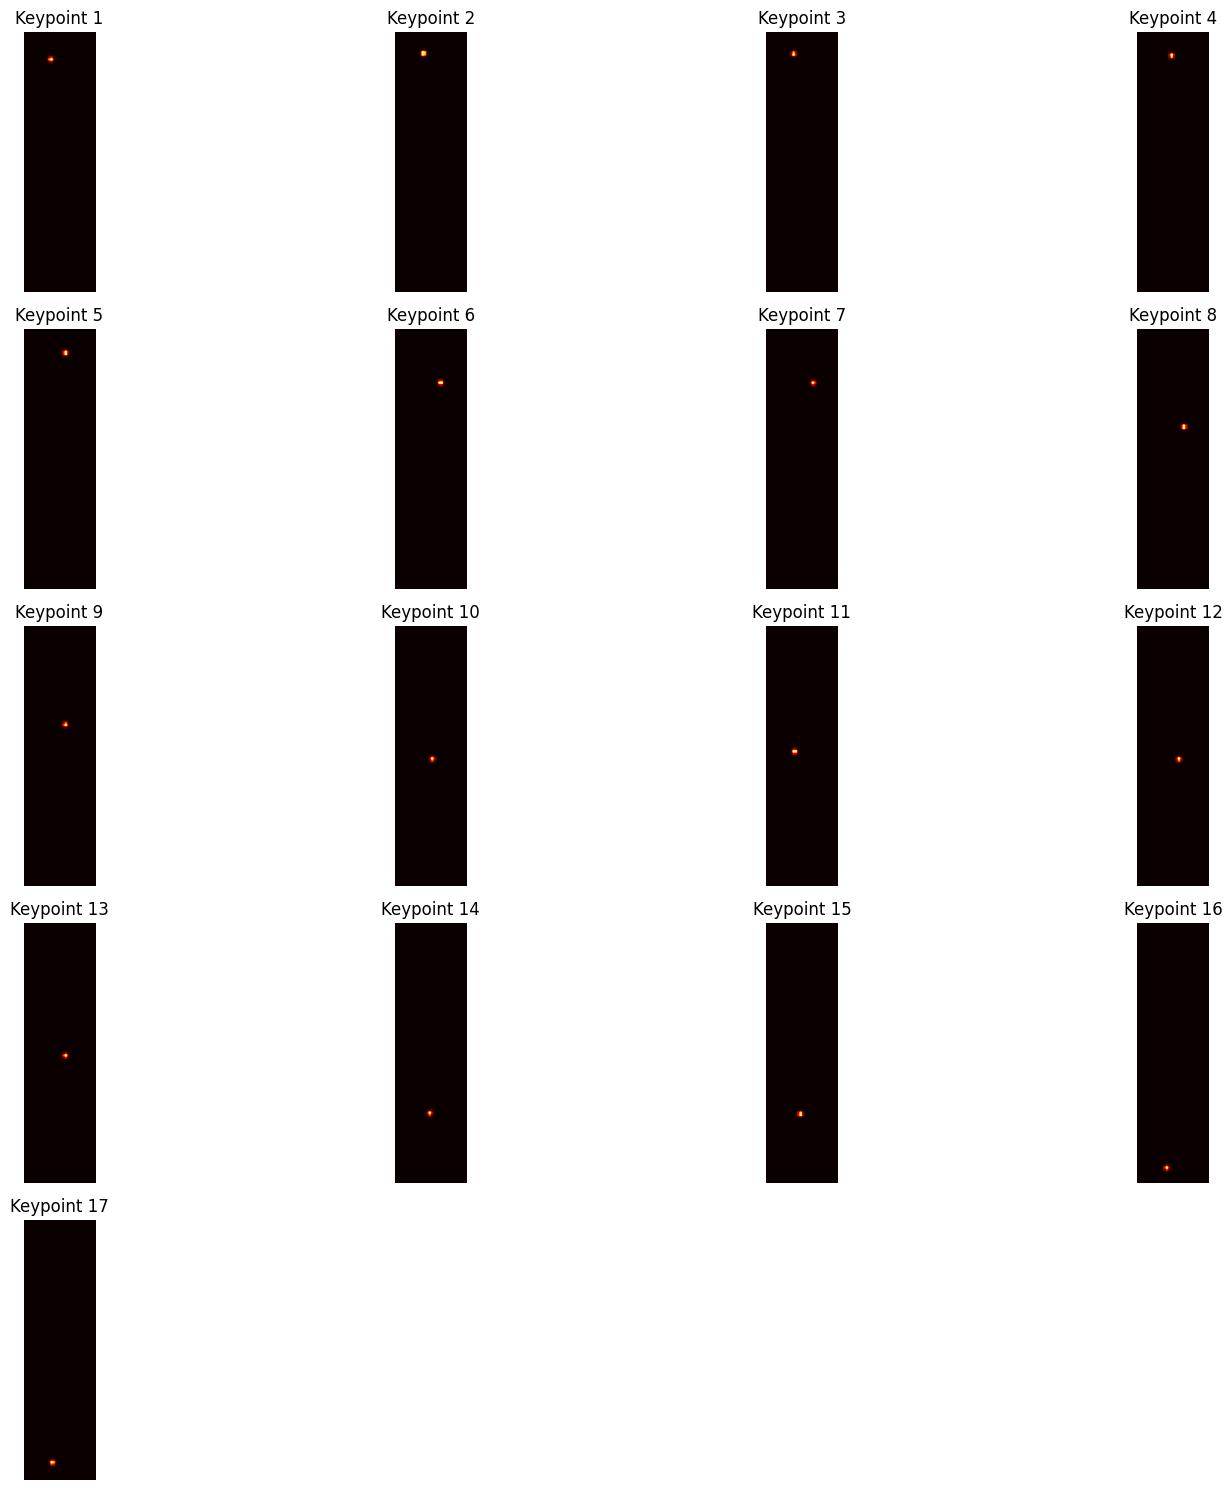

In [ ]:
def visualize_heatmaps(heatmaps):
    """
    Visualize each heatmap from a 3D heatmap array.

    Args:
    - heatmaps: numpy array of shape (K, H, W), where K is the number of keypoints.
    """
    K = heatmaps.shape[0]  # Number of keypoints
    num_cols = 4  # Number of columns in the plot grid
    num_rows = (K + num_cols - 1) // num_cols  # Calculate rows needed
    # plt.figure(figsize=(5, 3))  # Adjust the figure size based on the number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    axes = axes.flatten()

    for k in range(K):
        ax = axes[k]
        ax.imshow(heatmaps[k], cmap='hot')  # Show heatmap for keypoint k
        ax.axis('off')
        ax.set_title(f"Keypoint {k+1}")

    # Remove any extra subplots that are unused
    for i in range(K, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Example usage
visualize_heatmaps(heatmap)

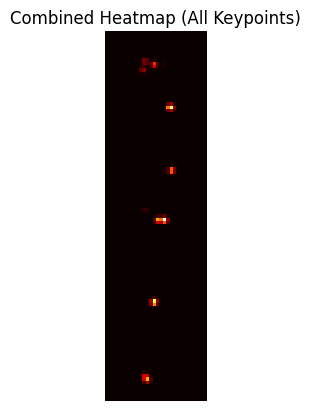

In [ ]:
def combine_heatmaps(heatmaps, method='sum'):
    """
    Combine all keypoint heatmaps into one.

    Args:
    - heatmaps: numpy array of shape (K, H, W), where K is the number of keypoints.
    - method: 'sum' or 'average', method to combine heatmaps.

    Returns:
    - combined_heatmap: Combined heatmap of shape (H, W).
    """
    if method == 'sum':
        # Sum the heatmaps along the keypoint dimension
        combined_heatmap = np.sum(heatmaps, axis=0)
    elif method == 'average':
        # Average the heatmaps along the keypoint dimension
        combined_heatmap = np.mean(heatmaps, axis=0)
    else:
        raise ValueError("Invalid method. Use 'sum' or 'average'.")

    return combined_heatmap
combined_heatmap = combine_heatmaps(heatmap, method='average')

# Visualize the combined heatmap
plt.imshow(combined_heatmap, cmap='hot')
plt.title("Combined Heatmap (All Keypoints)")
plt.axis('off')
plt.show()

In [ ]:
print(f'FPS: {total_frames/(end-start)}, Inference time: {end-start}s')

FPS: 8.827183240830047, Inference time: 100.93820142745972s


In [ ]:
from moviepy.editor import *
myvideo = VideoFileClip('./vis_result/shop_lifter_0.mp4')
ipython_display(myvideo)



t:  38%|███▊      | 336/891 [19:57<00:20, 27.49it/s, now=None]

t:  38%|███▊      | 336/891 [19:57<00:20, 27.49it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



                                                               

t:  38%|███▊      | 336/891 [19:59<00:20, 27.49it/s, now=None]

t:  38%|███▊      | 336/891 [19:59<00:20, 27.49it/s, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4


  0%|          | 0/7 [00:00<?, ?it/s]

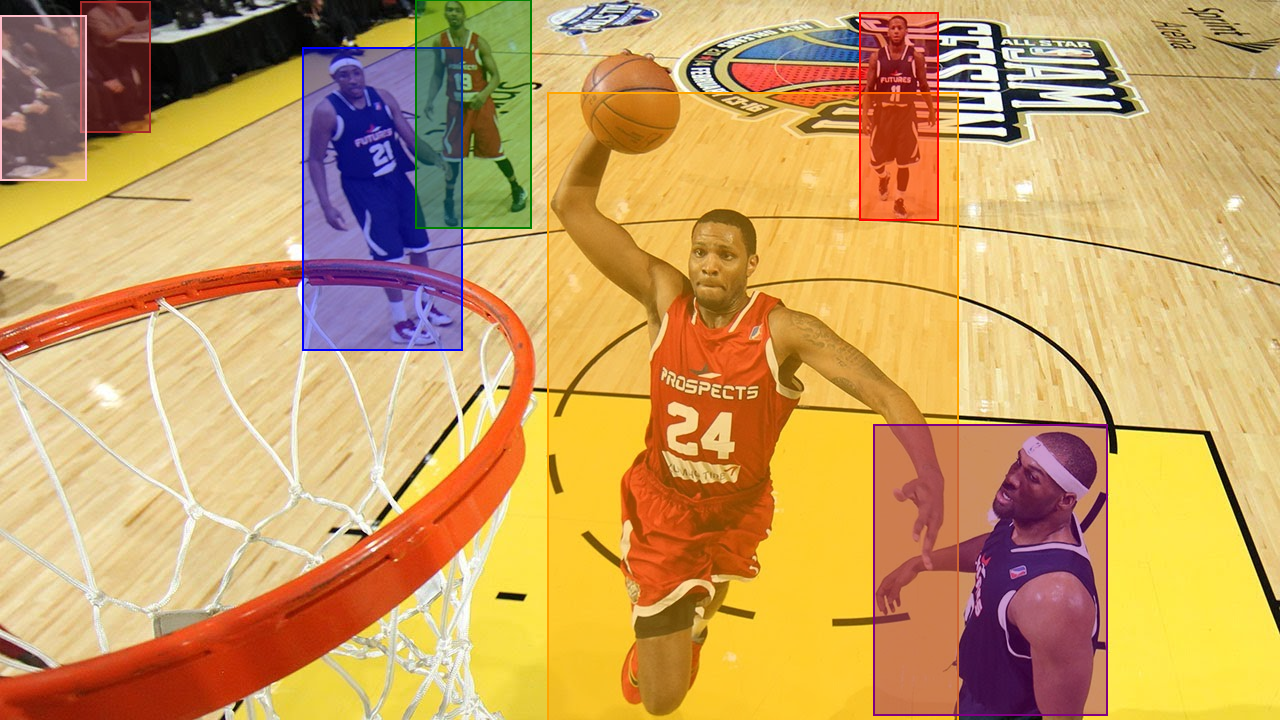

In [ ]:
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import numpy as np
import matplotlib.colors as mcolors
from tqdm.notebook import tqdm
img = read_image(img_path)
# colors = list(mcolors.CSS4_COLORS.keys())
colors = list(mcolors.TABLEAU_COLORS.keys())
bboxs = np.array([])
for i, res in enumerate(tqdm(result['predictions'][0])):
  # bounding box are xmin, ymin, xmax, ymax
  box = np.array(res['bbox'][0],dtype = np.float32)
  # print(box)
  box = torch.tensor(box)
  box = box.unsqueeze(0)

  # draw bounding box and fill color
  img = draw_bounding_boxes(img, box, width=2,
                            colors=colors[i].split(':')[-1],
                            fill=True)
  if len(bboxs) == 0:
      box = np.append(box,res['bbox_score'])
      bboxs = box
  else:
      box = np.append(box,res['bbox_score'])
      bboxs = np.vstack((bboxs,box))
  # transform this image to PIL image
img = torchvision.transforms.ToPILImage()(img)
img

In [ ]:
bboxs

array([[ 3.0273944e+02,  4.7752106e+01,  4.6273358e+02,  3.5027576e+02,
         9.7071362e-01],
       [ 5.4701379e+02,  9.2333282e+01,  9.5863196e+02,  7.2106470e+02,
         9.6599203e-01],
       [ 4.1500397e+02, -1.9825134e+00,  5.3104266e+02,  2.2878329e+02,
         9.6011949e-01],
       [ 8.5967230e+02,  1.2873169e+01,  9.3871844e+02,  2.2067035e+02,
         9.3066144e-01],
       [ 8.7382904e+02,  4.2462891e+02,  1.1074061e+03,  7.1569800e+02,
         9.1334450e-01],
       [ 8.0852768e+01,  1.0355835e+00,  1.5054630e+02,  1.3248853e+02,
         5.5049765e-01],
       [ 0.0000000e+00,  1.5239868e+01,  8.6155273e+01,  1.8092719e+02,
         4.9301431e-01]], dtype=float32)

In [ ]:
from yolox.tracker.byte_tracker import BYTETracker
byte_tracker = BYTETracker(BYTETrackerArgs())

In [ ]:
detections = Detection.from_numpy(pred=bboxs.copy())

In [ ]:
import numpy as np
np.float = np.float64

In [ ]:
output_results=detections2boxes(detections=detections)
print(type(output_results))

<class 'numpy.ndarray'>


In [ ]:
import cv2
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
tracks = byte_tracker.update(
        output_results=bboxs,
        img_info=img.shape,
        img_size=img.shape
)

In [ ]:
tracks_boxes = tracks2boxes(tracks=tracks)
tracks_boxes

array([[ 3.02739441e+02,  4.77521057e+01,  4.62733582e+02,
         3.50275757e+02],
       [ 5.47013785e+02,  9.23332825e+01,  9.58631967e+02,
         7.21064726e+02],
       [ 4.15003967e+02, -1.98251343e+00,  5.31042664e+02,
         2.28783295e+02],
       [ 8.59672302e+02,  1.28731689e+01,  9.38718445e+02,
         2.20670349e+02],
       [ 8.73829041e+02,  4.24628906e+02,  1.10740613e+03,
         7.15697998e+02],
       [ 8.08527679e+01,  1.03558350e+00,  1.50546295e+02,
         1.32488525e+02],
       [ 0.00000000e+00,  1.52398682e+01,  8.61552734e+01,
         1.80927185e+02]])

In [ ]:
detection_boxes = detections2boxes(detections=detections, with_confidence=False)

In [ ]:
tracked_detections = match_detections_with_tracks(detections=detections.copy(), tracks=tracks.copy())

In [ ]:
tracked_detections

[Detection(x_min=302.73944091796875, y_min=47.752105712890625, x_max=462.73358154296875, y_max=350.2757568359375, confidence=0.9707136154174805, tracker_id=1),
 Detection(x_min=547.0137939453125, y_min=92.33328247070312, x_max=958.6319580078125, y_max=721.064697265625, confidence=0.9659920334815979, tracker_id=2),
 Detection(x_min=415.00396728515625, y_min=-1.982513427734375, x_max=531.0426635742188, y_max=228.78329467773438, confidence=0.9601194858551025, tracker_id=3),
 Detection(x_min=859.6723022460938, y_min=12.8731689453125, x_max=938.7184448242188, y_max=220.67034912109375, confidence=0.9306614398956299, tracker_id=4),
 Detection(x_min=873.8290405273438, y_min=424.62890625, x_max=1107.4061279296875, y_max=715.697998046875, confidence=0.9133445024490356, tracker_id=5),
 Detection(x_min=80.85276794433594, y_min=1.03558349609375, x_max=150.54629516601562, y_max=132.488525390625, confidence=0.5504976511001587, tracker_id=6),
 Detection(x_min=0.0, y_min=15.2398681640625, x_max=86.1552